# Polynomial Regression with Phantom Numerical Data

In the medical field having both the dimensions and the mask of the thyroid may not always be available when a user wants to make use of this system to judge scale.

Below are methods which use one or the other to learn scale and produce an output.

## Importing Libraries

In [ ]:
# Used to work with arrays and matrix data structures
import numpy as np
# Data manipulation and analysis tool using data structures
import pandas as pd
# Used to evaluate machine learning performance, by splitting dataset
from sklearn.model_selection import train_test_split
# Training and inference of neural networks
import tensorflow as tf
# Measure of variance form dependent value to independent value
from sklearn.metrics import r2_score
# Data visualisation
import seaborn as sns
# Data visualisation
import matplotlib.pyplot as plt
# Using Linear Regression
from sklearn.linear_model import LinearRegression

## Reading in Data

In [ ]:
# Reading in Split dataset
sep_data = pd.read_csv('Data_Table_Complete_CSV_CLEAN.csv')
# Printing contents of dataset
print(sep_data)

    Scan_Height_mm  Scan_Height_Layers  mm_per_Layer_Height  Scan_Width_mm  \
0             24.8                  55             0.450909           21.7   
1             26.3                  46             0.571739           18.5   
2             25.4                  58             0.437931           20.4   
3             25.3                  36             0.702778           21.6   
4             27.8                  46             0.604348           21.9   
5             30.0                  46             0.652174           22.7   
6             23.6                  41             0.575610           20.8   
7             27.1                  60             0.451667           20.8   
8             26.0                  45             0.577778           21.6   
9             23.9                  48             0.497917           19.8   
10            26.0                  20             1.300000           22.2   
11            27.2                  27             1.007407     

In [ ]:
# Reading in Full dataset
full_data = pd.read_csv('Data_Table_Complete_FULL_CSV_CLEAN.csv')
# Printing contents of dataset
print(full_data)

    Scan_Length_mm  Scan_Layers  mm_per_Layer
0             24.8           55      0.450909
1             26.3           46      0.571739
2             25.4           58      0.437931
3             25.3           36      0.702778
4             27.8           46      0.604348
5             30.0           46      0.652174
6             23.6           41      0.575610
7             27.1           60      0.451667
8             26.0           45      0.577778
9             23.9           48      0.497917
10            26.0           20      1.300000
11            27.2           27      1.007407
12            24.1           28      0.860714
13            21.7          395      0.054937
14            18.5          422      0.043839
15            20.4          409      0.049878
16            21.6          430      0.050233
17            21.9          365      0.060000
18            22.7          334      0.067964
19            20.8          316      0.065823
20            20.8          314   

## Polynomial Regression

#### Can fit a wide range of curvatures
#### Provides good approximation of the relationship between dependent and independent variables

#### Can be sensitive to outliers
#### Fewer model evaluation tools

## Polynomial Regression_Split_Dataset_Height

In [ ]:
# Taking two variables from dataset to train on
layers_mm = sep_data[['Scan_Height_Layers','mm_per_Layer_Height']]
 
# Taking only the selected two attributes from the datase
layers_mm.columns = ['Height_Layers', 'Layer_mm']
# Displaying the first 5 rows
layers_mm.head()

,Height_Layers,Layer_mm
0,55,0.450909
1,46,0.571739
2,58,0.437931
3,36,0.702778
4,46,0.604348


In [ ]:
# Splitting Height_Layers and Layer_mm into X and y
X = layers_mm['Height_Layers']
y = layers_mm['Layer_mm']

In [ ]:
# Train, test splitting dataset to obtain accuraccy later on
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Text(0.5, 1.0, 'Plot of Height_Layers vs Layer_mm')

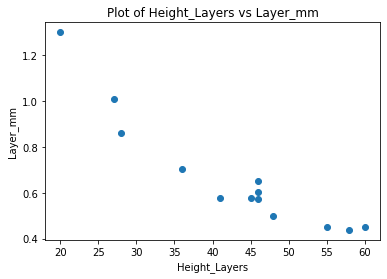

In [ ]:
# Plotting X and y to view possible correlation
plt.scatter(X, y)
plt.xlabel("Height_Layers")
plt.ylabel("Layer_mm")
plt.title("Plot of Height_Layers vs Layer_mm")

### Linear

In [ ]:
model = LinearRegression()

In [ ]:
X1 = np.array(layers_mm['Height_Layers']).reshape(-1, 1)
model.fit(X1, y)

LinearRegression()

In [ ]:
model = LinearRegression().fit(X1, y)

In [ ]:
r_sq = model.score(X1, y)

In [ ]:
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8678592931785425


### Poly Continue

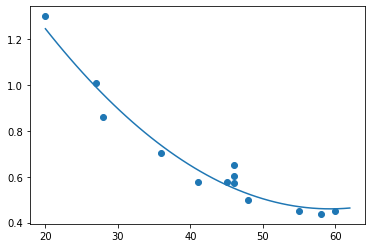

In [ ]:
# Polynomial fit with degree = 2
model = np.poly1d(np.polyfit(X, y, 2))

# Adding fitted polynomial line to scatterplot
polyline = np.linspace(20, 62, 50)
# Plotting X and y
plt.scatter(X, y)
# Plotting fitted line to plot
plt.plot(polyline, model(polyline))
plt.show()

In [ ]:
print(model)

           2
0.0005082 x - 0.06029 x + 2.248


In [ ]:
def score(x, y):
  for i in range(12):
    # Polynomial fit with increasing degree
    model = np.poly1d(np.polyfit(x, y, i))
    print('Polynomial degree:', i)
    print()
    print(model)


    # Adding fitted polynomial line to scatterplot
    polyline = np.linspace(20, 62, 50)
    # Plotting X and y
    plt.scatter(x, y)
    # Plotting fitted line to plot
    plt.plot(polyline, model(polyline))
    plt.show()


    print('R2 Score:', r2_score(y, model(x)))
    print('---------')
  return 

Polynomial degree: 0

 
0.6685


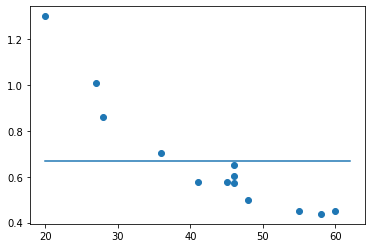

R2 Score: 0.0
---------
Polynomial degree: 1

 
-0.01926 x + 1.492


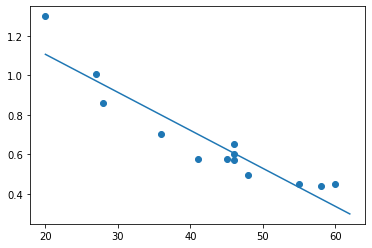

R2 Score: 0.8678592931785425
---------
Polynomial degree: 2

           2
0.0005082 x - 0.06029 x + 2.248


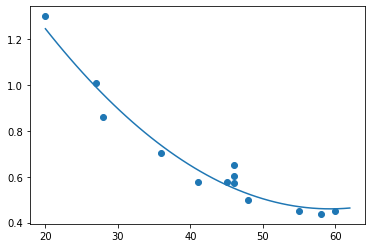

R2 Score: 0.9570345626033292
---------
Polynomial degree: 3

            3            2
-2.049e-05 x + 0.003027 x - 0.1576 x + 3.405


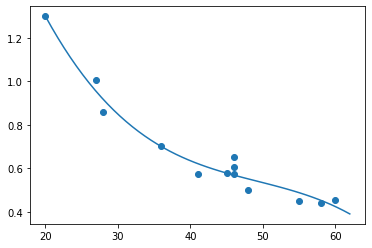

R2 Score: 0.9716309986510799
---------
Polynomial degree: 4

           4            3            2
5.549e-07 x - 0.000108 x + 0.007975 x - 0.2758 x + 4.409


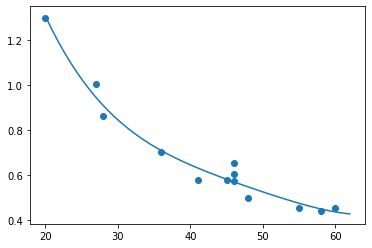

R2 Score: 0.9725977544135943
---------
Polynomial degree: 5

           5             4            3           2
1.216e-07 x - 2.397e-05 x + 0.001809 x - 0.06434 x + 1.034 x - 4.667


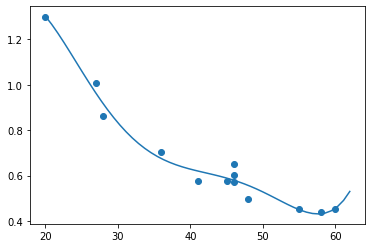

R2 Score: 0.9770056047080208
---------
Polynomial degree: 6

            6             5            4            3         2
-6.237e-09 x + 1.658e-06 x - 0.000178 x + 0.009822 x - 0.292 x + 4.376 x - 24.41


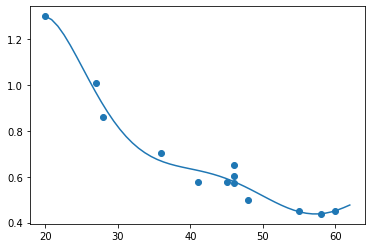

R2 Score: 0.9773495894866906
---------
Polynomial degree: 7

           7             6             5            4           3
5.636e-10 x - 1.702e-07 x + 2.175e-05 x - 0.001519 x + 0.06239 x
          2
 - 1.501 x + 19.44 x - 102.6


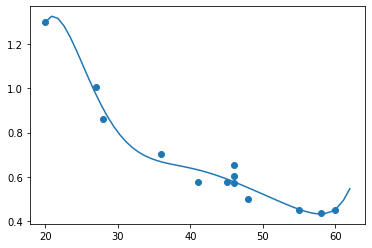

R2 Score: 0.9775627097603713
---------
Polynomial degree: 8

            8             7             6            5           4
-2.495e-10 x + 8.414e-08 x - 1.224e-05 x + 0.001002 x - 0.05045 x
          3         2
 + 1.598 x - 31.03 x + 337.4 x - 1567


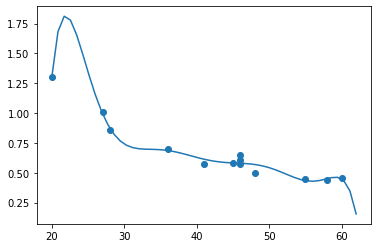

R2 Score: 0.9820606516846491
---------
Polynomial degree: 9

           9            8             7             6           5
7.106e-11 x - 2.68e-08 x + 4.433e-06 x - 0.0004219 x + 0.02545 x
          4         3       2
 - 1.008 x + 26.18 x - 430 x + 4047 x - 1.661e+04


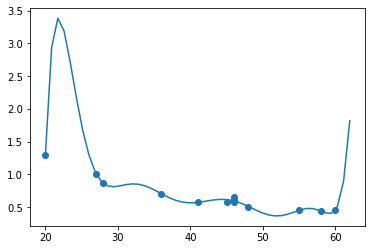

R2 Score: 0.992895311433694
---------
Polynomial degree: 10

           10             9             8             7           6
3.617e-11 x  - 1.507e-08 x + 2.793e-06 x - 0.0003033 x + 0.02134 x
          5        4         3             2
 - 1.017 x + 33.2 x - 732.8 x + 1.046e+04 x - 8.713e+04 x + 3.213e+05


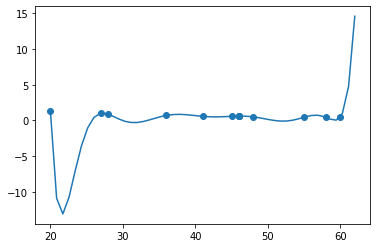

R2 Score: 0.9956871184064668
---------
Polynomial degree: 11

           11             10             9            8             7
3.438e-13 x  - 1.234e-10 x  + 1.828e-08 x - 1.35e-06 x + 3.652e-05 x
             6          5         4         3        2
 + 0.002035 x - 0.2416 x + 11.21 x - 301.5 x + 4891 x - 4.454e+04 x + 1.754e+05


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


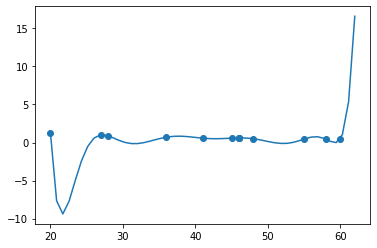

R2 Score: 0.9956871184067518
---------


In [ ]:
score(X, y)

### Height_Model

##### Polynomial value of 3 has been chosen as it provides a good R2 score while trying not to fall into the trap of overfitting.

Polynomial degree: 3

            3            2
-2.049e-05 x + 0.003027 x - 0.1576 x + 3.405


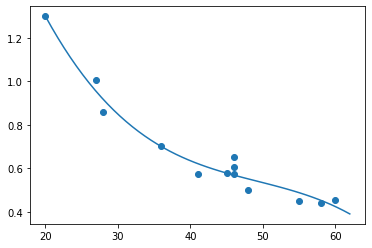

In [ ]:
height_model = np.poly1d(np.polyfit(X, y, 3))
print('Polynomial degree:', 3)
print()
print(height_model)


# Adding fitted polynomial line to scatterplot
polyline = np.linspace(20, 62, 50)
# Plotting X and y
plt.scatter(X, y)
# Plotting fitted line to plot
plt.plot(polyline, height_model(polyline))
plt.show()

# Polynomial Regression_Split_Dataset_Height_Other

In [ ]:
# Taking two variables from dataset to train on
layers_mm = sep_data[['Scan_Height_mm','mm_per_Layer_Height']]
 
# Taking only the selected two attributes from the datase
layers_mm.columns = ['Height_mm', 'Layer_mm']
# Displaying the first 5 rows
layers_mm.head()

,Height_mm,Layer_mm
0,24.8,0.450909
1,26.3,0.571739
2,25.4,0.437931
3,25.3,0.702778
4,27.8,0.604348


In [ ]:
# Splitting Height_mm and Layer_mm into X and y
X = layers_mm['Height_mm']
y = layers_mm['Layer_mm']

In [ ]:
# Train, test splitting dataset to obtain accuraccy later on
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Text(0.5, 1.0, 'Plot of Height_mm vs Layer_mm')

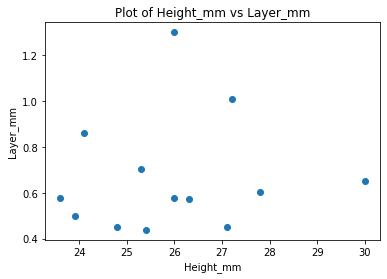

In [ ]:
# Plotting X and y to view possible correlation
plt.scatter(X, y)
plt.xlabel("Height_mm")
plt.ylabel("Layer_mm")
plt.title("Plot of Height_mm vs Layer_mm")

### From this graph it would appear there is poor correlation between height of the thyrois and the distance between layers.

## Linear

In [ ]:
model = LinearRegression()

In [ ]:
X1 = np.array(layers_mm['Height_mm']).reshape(-1, 1)
model.fit(X1, y)

LinearRegression()

In [ ]:
model = LinearRegression().fit(X1, y)

In [ ]:
r_sq = model.score(X1, y)

In [ ]:
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.010471870307053321


## Poly Continue

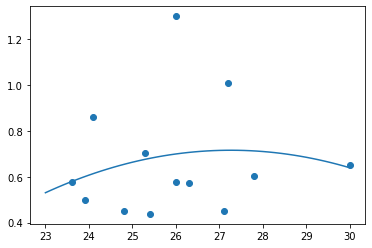

In [ ]:
# Polynomial fit with degree = 2
model = np.poly1d(np.polyfit(X, y, 2))

# Adding fitted polynomial line to scatterplot
polyline = np.linspace(23, 30, 50)
# Plotting X and y
plt.scatter(X, y)
# Plotting fitted line to plot
plt.plot(polyline, model(polyline))
plt.show()

In [ ]:
print(model)

         2
-0.0102 x + 0.5559 x - 6.863


In [ ]:
def score(x, y):
  for i in range(12):
    # Polynomial fit with increasing degree
    model = np.poly1d(np.polyfit(X, y, i))
    print('Polynomial degree:', i)
    print()
    print(model)

    # Adding fitted polynomial line to scatterplot
    polyline = np.linspace(23, 30, 50)
    # Plotting X and y
    plt.scatter(x, y)
    # Plotting fitted line to plot
    plt.plot(polyline, model(polyline))
    plt.show()



    print('R2 Score:', r2_score(y, model(X)))
    print('---------')
  return 

Polynomial degree: 0

 
0.6685


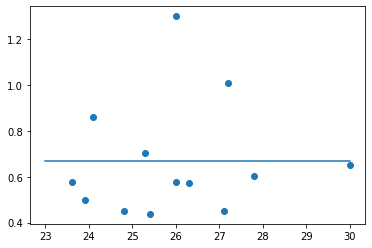

R2 Score: 0.0
---------
Polynomial degree: 1

 
0.01446 x + 0.2932


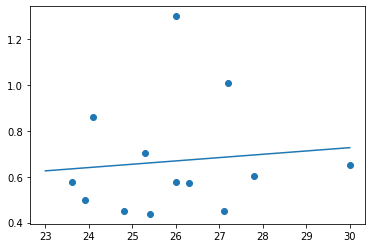

R2 Score: 0.010471870307053432
---------
Polynomial degree: 2

         2
-0.0102 x + 0.5559 x - 6.863


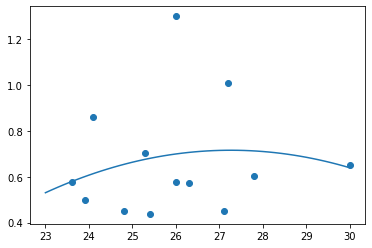

R2 Score: 0.035132482826994105
---------
Polynomial degree: 3

           3           2
9.027e-05 x - 0.01744 x + 0.7489 x - 8.57


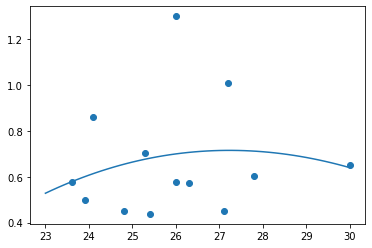

R2 Score: 0.03513673549174279
---------
Polynomial degree: 4

          4          3         2
0.006266 x - 0.6674 x + 26.58 x - 469.2 x + 3098


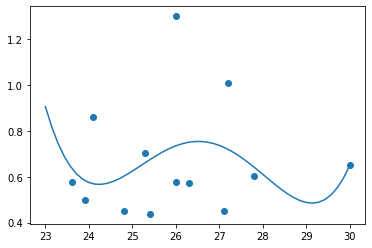

R2 Score: 0.05966730483793825
---------
Polynomial degree: 5

          5          4         3         2
0.004803 x - 0.6286 x + 32.84 x - 856.2 x + 1.114e+04 x - 5.787e+04


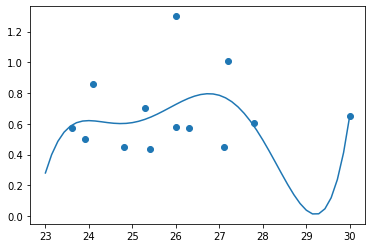

R2 Score: 0.08053705653551446
---------
Polynomial degree: 6

           6          5         4        3             2
-0.005761 x + 0.9146 x - 60.42 x + 2126 x - 4.201e+04 x + 4.422e+05 x - 1.937e+06


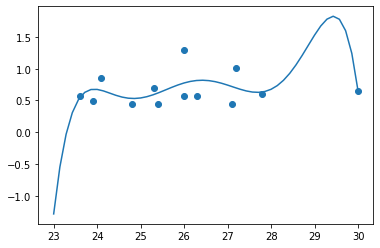

R2 Score: 0.12106709747434585
---------
Polynomial degree: 7

          7          6         5        4             3             2
0.004284 x - 0.7926 x + 62.78 x - 2760 x + 7.273e+04 x - 1.149e+06 x + 1.007e+07 x - 3.781e+07


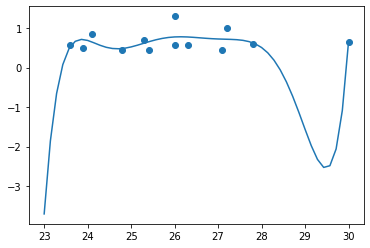

R2 Score: 0.13147935922165388
---------
Polynomial degree: 8

         8         7         6             5             4
0.03886 x - 8.112 x + 740.3 x - 3.857e+04 x + 1.255e+06 x
              3             2
 - 2.611e+07 x + 3.393e+08 x - 2.517e+09 x + 8.164e+09


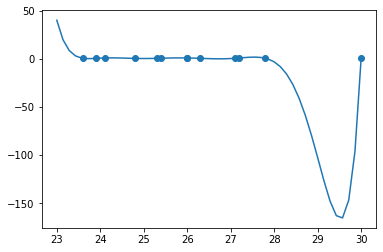

R2 Score: 0.5224470272170967
---------
Polynomial degree: 9

           9          8        7         6        5            4
0.0007412 x - 0.1346 x + 9.92 x - 352.3 x + 3960 x + 1.52e+05 x
              3             2
 - 7.055e+06 x + 1.278e+08 x - 1.148e+09 x + 4.23e+09


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


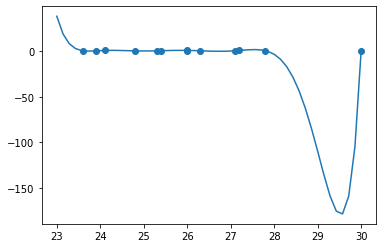

R2 Score: 0.5264102189222191
---------
Polynomial degree: 10

           10           9         8         7        6             5
0.0001628 x  - 0.03299 x + 2.802 x - 123.4 x + 2513 x + 1.442e+04 x
              4            3             2
 - 2.233e+06 x + 6.03e+07 x - 8.382e+08 x + 6.205e+09 x - 1.945e+10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


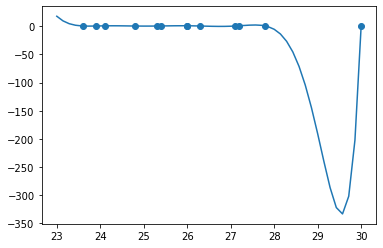

R2 Score: 0.5487902707293226
---------
Polynomial degree: 11

           11             10           9         8         7         6
3.033e-06 x  - 0.0005458 x  + 0.03866 x - 1.209 x + 4.177 x + 770.4 x
              5             4             3            2
 - 1.444e+04 x - 3.458e+05 x + 1.857e+07 x - 3.31e+08 x + 2.829e+09 x - 9.772e+09


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


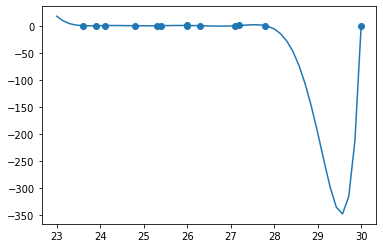

R2 Score: 0.5496024656894353
---------


In [ ]:
score(X, y)

# Polynomial Regression_Split_Dataset_Width

In [ ]:
# Taking two variables from dataset to train on
layers_mm = sep_data[['Scan_Width_Layers','mm_per_Layer_Width']]
 
# Taking only the selected two attributes from the datase
layers_mm.columns = ['Width_Layers', 'Layer_mm']
# Displaying the first 5 rows
layers_mm.head()

,Width_Layers,Layer_mm
0,395,0.054937
1,422,0.043839
2,409,0.049878
3,430,0.050233
4,365,0.060000


In [ ]:
# Splitting Width_Layers and Layer_mm into X and y
X = layers_mm['Width_Layers']
y = layers_mm['Layer_mm']

In [ ]:
# Train, test splitting dataset to obtain accuraccy later on
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Text(0.5, 1.0, 'Plot of Width_Layers vs Layer_mm')

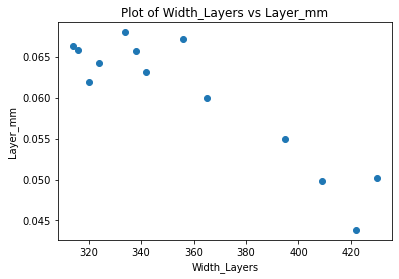

In [ ]:
# Plotting X and y to view possible correlation
plt.scatter(X, y)
plt.xlabel("Width_Layers")
plt.ylabel("Layer_mm")
plt.title("Plot of Width_Layers vs Layer_mm")

## Linear

In [ ]:
model = LinearRegression()

In [ ]:
X1 = np.array(layers_mm['Width_Layers']).reshape(-1, 1)
model.fit(X1, y)

LinearRegression()

In [ ]:
model = LinearRegression().fit(X1, y)

In [ ]:
r_sq = model.score(X1, y)

In [ ]:
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8206457100870652


## Poly Continue

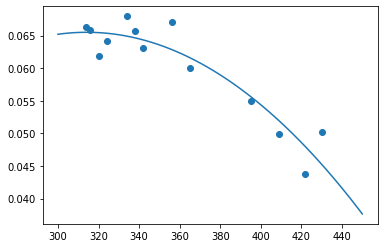

In [ ]:
# Polynomial fit with degree = 2
model = np.poly1d(np.polyfit(X, y, 2))

# Adding fitted polynomial line to scatterplot
polyline = np.linspace(300, 450, 50)
# Plotting X and y
plt.scatter(X, y)
# Plotting fitted line to plot
plt.plot(polyline, model(polyline))
plt.show()

In [ ]:
print(model)

            2
-1.511e-06 x + 0.0009495 x - 0.08367


In [ ]:
def score(x, y):
  for i in range(12):
    # Polynomial fit with increasing degree
    model = np.poly1d(np.polyfit(X, y, i))
    print('Polynomial degree:', i)
    print()
    print(model)

    # Adding fitted polynomial line to scatterplot
    polyline = np.linspace(300, 450, 50)
    # Plotting X and y
    plt.scatter(x, y)
    # Plotting fitted line to plot
    plt.plot(polyline, model(polyline))
    plt.show()

    print('R2 Score:', r2_score(y, model(X)))
    print('---------')
  return 

Polynomial degree: 0

 
0.06007


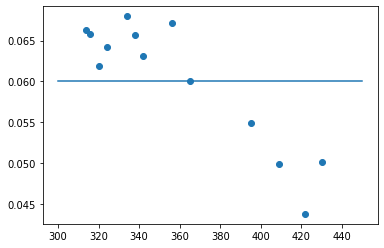

R2 Score: -2.220446049250313e-16
---------
Polynomial degree: 1

 
-0.0001702 x + 0.1212


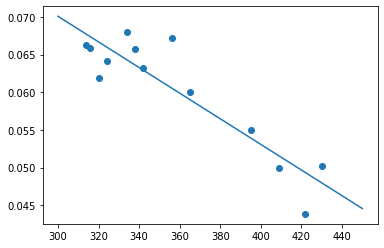

R2 Score: 0.820645710087065
---------
Polynomial degree: 2

            2
-1.511e-06 x + 0.0009495 x - 0.08367


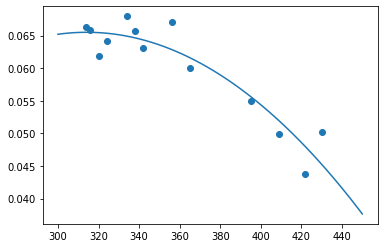

R2 Score: 0.8723632409145679
---------
Polynomial degree: 3

           3             2
3.593e-08 x - 4.129e-05 x + 0.01554 x - 1.857


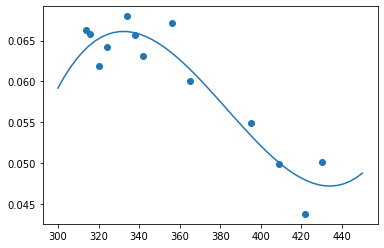

R2 Score: 0.9009440547253802
---------
Polynomial degree: 4

           4             3             2
1.119e-09 x - 1.626e-06 x + 0.0008807 x - 0.2108 x + 18.89


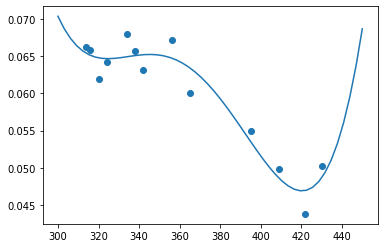

R2 Score: 0.9226179048782117
---------
Polynomial degree: 5

           5             4             3            2
1.423e-11 x - 2.525e-08 x + 1.785e-05 x - 0.006289 x + 1.105 x - 77.36


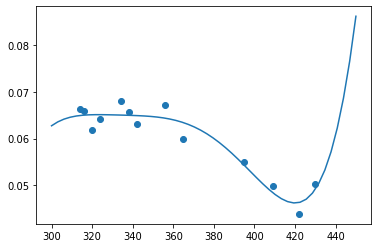

R2 Score: 0.9253592187208881
---------
Polynomial degree: 6

           6             5             4            3          2
1.459e-12 x - 3.245e-09 x + 2.999e-06 x - 0.001475 x + 0.4074 x - 59.86 x + 3657


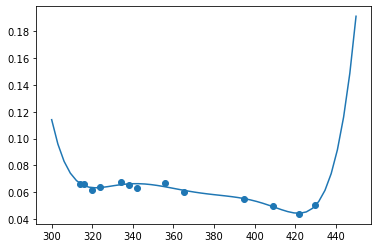

R2 Score: 0.9556729491019569
---------
Polynomial degree: 7

           7             6            5             4            3
1.464e-14 x - 3.648e-11 x + 3.88e-08 x - 2.284e-05 x + 0.008027 x
          2
 - 1.685 x + 195.6 x - 9678


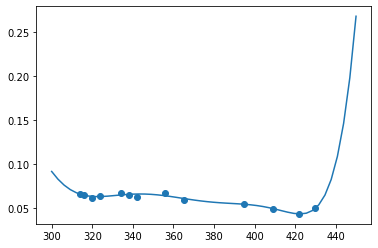

R2 Score: 0.9575069010171886
---------
Polynomial degree: 8

           8             7             6             5            4
3.853e-16 x - 1.132e-12 x + 1.455e-09 x - 1.067e-06 x + 0.000489 x
           3         2
 - 0.1432 x + 26.21 x - 2738 x + 1.251e+05


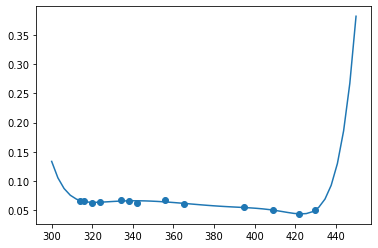

R2 Score: 0.9584661332711354
---------
Polynomial degree: 9

            9             8             7            6             5
-8.016e-17 x + 2.676e-13 x - 3.964e-10 x + 3.42e-07 x - 0.0001894 x
            4         3        2
 + 0.06979 x - 17.12 x + 2695 x - 2.472e+05 x + 1.006e+07


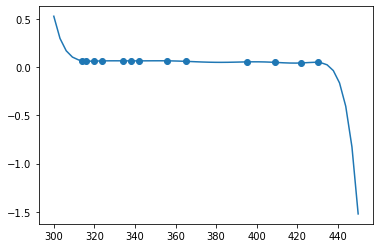

R2 Score: 0.9715289754224354
---------
Polynomial degree: 10

           10             9             8             7             6
-1.11e-19 x  + 3.257e-16 x - 3.992e-13 x + 2.518e-10 x - 7.087e-08 x
              5           4         3        2
 - 9.321e-06 x + 0.01535 x - 5.848 x + 1166 x - 1.244e+05 x + 5.629e+06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


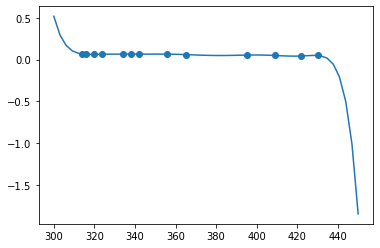

R2 Score: 0.9721333462474131
---------
Polynomial degree: 11

            11             10             9             8             7
-1.335e-20 x  + 4.348e-17 x  - 6.065e-14 x + 4.572e-11 x - 1.819e-08 x
              6            5         4         3             2
 + 1.527e-06 x + 0.002269 x - 1.323 x + 373.2 x - 6.118e+04 x + 5.594e+06 x - 2.221e+08


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


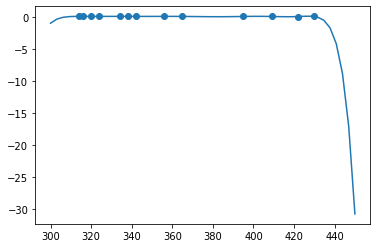

R2 Score: 0.9991359676903213
---------


In [ ]:
score(X, y)

## Width_Model

##### Polynomial value of 3 has been chosen as it provides a good R2 score while trying not to fall into the trap of overfitting.

Polynomial degree: 3

           3             2
3.593e-08 x - 4.129e-05 x + 0.01554 x - 1.857


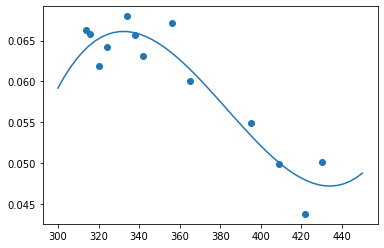

In [ ]:
width_model = np.poly1d(np.polyfit(X, y, 3))
print('Polynomial degree:', 3)
print()
print(width_model)


# Adding fitted polynomial line to scatterplot
polyline = np.linspace(300, 450, 50)
# Plotting X and y
plt.scatter(X, y)
# Plotting fitted line to plot
plt.plot(polyline, width_model(polyline))
plt.show()

# Polynomial Regression_Split_Dataset_Depth

In [ ]:
# Taking two variables from dataset to train on
layers_mm = sep_data[['Scan_Depth_Layers','mm_per_Layer_Depth']]
 
# Taking only the selected two attributes from the datase
layers_mm.columns = ['Depth_Layers', 'Layer_mm']
# Displaying the first 5 rows
layers_mm.head()

,Depth_Layers,Layer_mm
0,382,0.052618
1,379,0.050132
2,400,0.050000
3,362,0.050829
4,372,0.058065


In [ ]:
# Splitting Depth_Layers and Layer_mm into X and y
X = layers_mm['Depth_Layers']
y = layers_mm['Layer_mm']

In [ ]:
# Train, test splitting dataset to obtain accuraccy later on
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Text(0.5, 1.0, 'Plot of Depth_Layers vs Layer_mm')

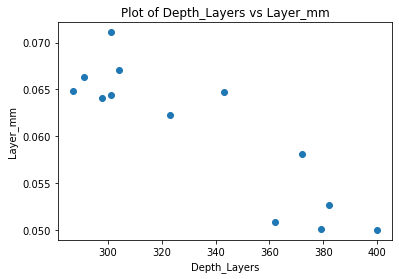

In [ ]:
# Plotting X and y to view possible correlation
plt.scatter(X, y)
plt.xlabel("Depth_Layers")
plt.ylabel("Layer_mm")
plt.title("Plot of Depth_Layers vs Layer_mm")

## Linear

In [ ]:
model = LinearRegression()

In [ ]:
X1 = np.array(layers_mm['Depth_Layers']).reshape(-1, 1)
model.fit(X1, y)

LinearRegression()

In [ ]:
model = LinearRegression().fit(X1, y)

In [ ]:
r_sq = model.score(X1, y)

In [ ]:
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7931489644460755


## Poly Continue

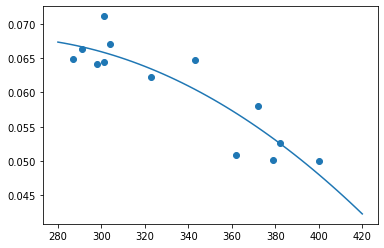

In [ ]:
# Polynomial fit with degree = 2
model = np.poly1d(np.polyfit(X, y, 2))

# Adding fitted polynomial line to scatterplot
polyline = np.linspace(280, 420, 50)
# Plotting X and y
plt.scatter(X, y)
# Plotting fitted line to plot
plt.plot(polyline, model(polyline))
plt.show()

In [ ]:
print(model)

           2
-9.03e-07 x + 0.0004533 x + 0.01121


In [ ]:
def score(x, y):
  for i in range(12):
    # Polynomial fit with increasing degree
    model = np.poly1d(np.polyfit(X, y, i))
    print('Polynomial degree:', i)
    print()
    print(model)

    # Adding fitted polynomial line to scatterplot
    polyline = np.linspace(280, 420, 50)
    # Plotting X and y
    plt.scatter(x, y)
    # Plotting fitted line to plot
    plt.plot(polyline, model(polyline))
    plt.show()


    print('R2 Score:', r2_score(y, model(X)))
    print('---------')
  return 

Polynomial degree: 0

 
0.0605


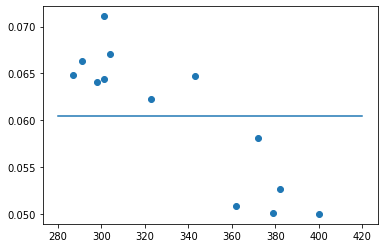

R2 Score: 3.3306690738754696e-16
---------
Polynomial degree: 1

 
-0.0001608 x + 0.1142


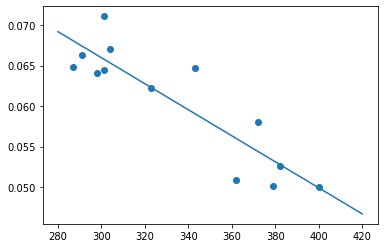

R2 Score: 0.7931489644460756
---------
Polynomial degree: 2

           2
-9.03e-07 x + 0.0004533 x + 0.01121


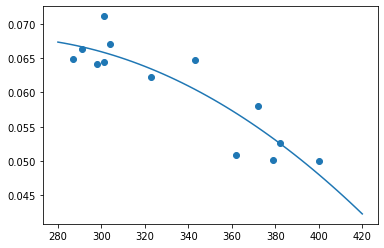

R2 Score: 0.8085675305341613
---------
Polynomial degree: 3

           3             2
3.433e-08 x - 3.633e-05 x + 0.01256 x - 1.36


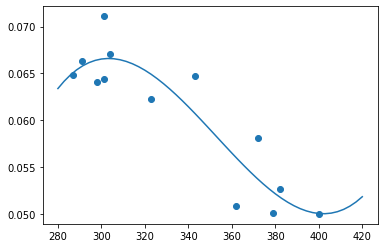

R2 Score: 0.8344742697843262
---------
Polynomial degree: 4

           4             3             2
2.884e-11 x - 5.278e-09 x - 1.602e-05 x + 0.00796 x - 0.9702


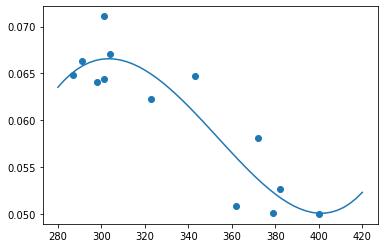

R2 Score: 0.8344906678528534
---------
Polynomial degree: 5

           5             4             3             2
2.616e-13 x - 4.187e-10 x + 2.998e-07 x - 0.0001196 x + 0.02549 x - 2.152


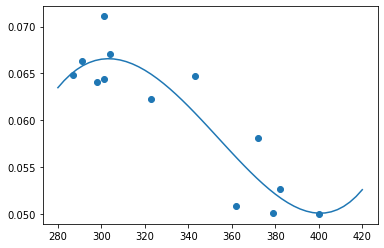

R2 Score: 0.8344914230824401
---------
Polynomial degree: 6

            6             5             4            3          2
-1.266e-12 x + 2.598e-09 x - 2.216e-06 x + 0.001005 x - 0.2558 x + 34.62 x - 1947


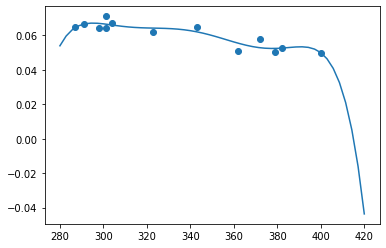

R2 Score: 0.8431909670034231
---------
Polynomial degree: 7

          7             6            5             4            3
1.86e-15 x - 5.711e-12 x + 7.14e-09 x - 4.788e-06 x + 0.001878 x
           2
 - 0.4329 x + 54.55 x - 2907


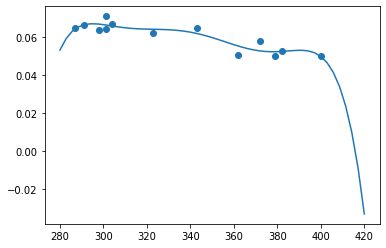

R2 Score: 0.8432019583911745
---------
Polynomial degree: 8

           8             7             6             5            4
4.716e-15 x - 1.278e-11 x + 1.513e-08 x - 1.021e-05 x + 0.004298 x
          3         2
 - 1.156 x + 193.8 x - 1.854e+04 x + 7.743e+05


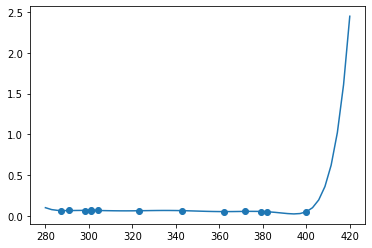

R2 Score: 0.8904817700334612
---------
Polynomial degree: 9

           9             8             7             6             5
4.408e-17 x - 1.303e-13 x + 1.707e-10 x - 1.301e-07 x + 6.356e-05 x
            4         3         2
 - 0.02064 x + 4.456 x - 616.5 x + 4.961e+04 x - 1.768e+06


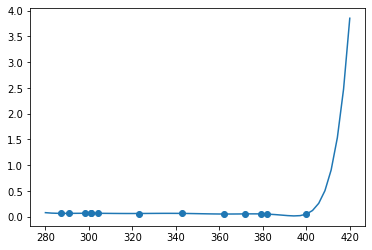

R2 Score: 0.8913716680091314
---------
Polynomial degree: 10

            10             9             8             7             6
-1.391e-17 x  + 4.704e-14 x - 7.146e-11 x + 6.423e-08 x - 3.783e-05 x
            5         4       3             2
 + 0.01526 x - 4.267 x + 817 x - 1.025e+05 x + 7.61e+06 x - 2.539e+08


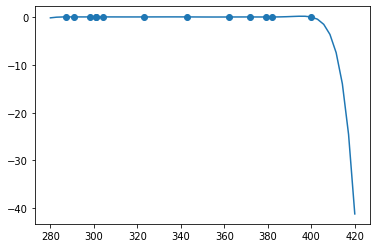

R2 Score: 0.9605682255440453
---------
Polynomial degree: 11

            11             10             9             8             7
-1.898e-20 x  + 5.707e-17 x  - 7.348e-14 x + 5.115e-11 x - 1.882e-08 x
              6            5         4         3             2
 + 1.494e-06 x + 0.001974 x - 1.066 x + 277.8 x - 4.204e+04 x + 3.548e+06 x - 1.3e+08


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


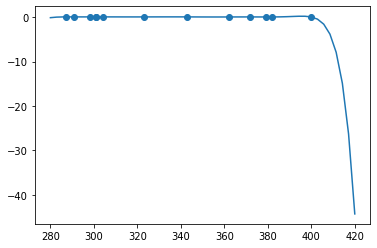

R2 Score: 0.9602819900001379
---------


In [ ]:
score(X, y)

## Depth_Model

##### Polynomial value of 3 has been chosen as it provides a good R2 score while trying not to fall into the trap of overfitting.

Polynomial degree: 3

           3             2
3.433e-08 x - 3.633e-05 x + 0.01256 x - 1.36


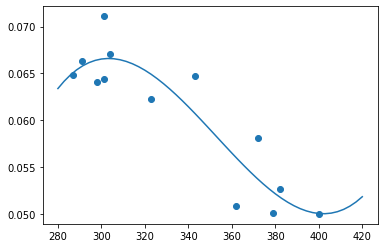

In [ ]:
depth_model = np.poly1d(np.polyfit(X, y, 3))
print('Polynomial degree:', 3)
print()
print(depth_model)


# Adding fitted polynomial line to scatterplot
polyline = np.linspace(280, 420, 50)
# Plotting X and y
plt.scatter(X, y)
# Plotting fitted line to plot
plt.plot(polyline, depth_model(polyline))
plt.show()

# Testing split Model

To test these models one of the scans will be chosen randomly, taking its height, width, and depth layers will be passed in. This will give the layer distance in the three axis, these will then be taken and put into Slicer. These will be compared to carrying out the calculations manually.

Taking Scan 7

Height_Layers: 41

Width_Layers: 316

Depth_Layers: 298

In [ ]:
print("mm per layer height:",height_model(41))  # true value: 0.57561
print("mm per layer width:",width_model(316))   # true value: 0.065823
print("mm per layer depth:",depth_model(298))   # true value: 0.064094

mm per layer height: 0.6216140783644364
mm per layer width: 0.06450146841938054
mm per layer depth: 0.0664386291655692


Testing on 1.5cm echogenic cube

In [ ]:
print("mm per layer height:",height_model(56)) # true value: 0.2678 
print("mm per layer width:",width_model(369)) # true value: 0.04065  
print("mm per layer depth:",depth_model(319)) # true value: 0.047

mm per layer height: 0.47672291110955456
mm per layer width: 0.06050480841924055
mm per layer depth: 0.06547210939251591


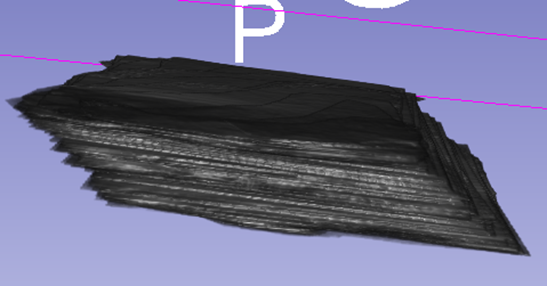
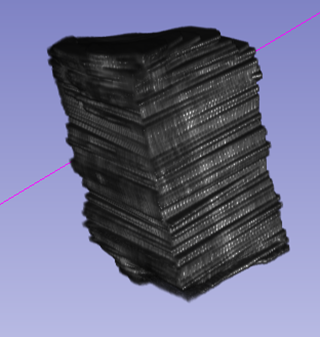
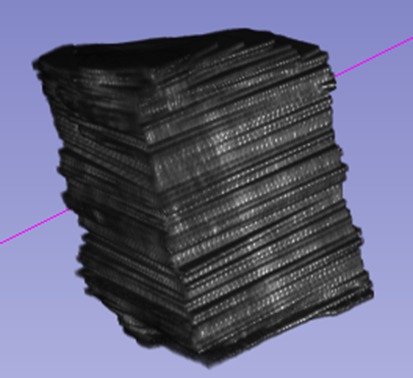

# Polynomial Regression_Full_Dataset

In [ ]:
# Taking two variables from dataset to train on
layers_mm = full_data[['Scan_Layers','mm_per_Layer']]
 
# Taking only the selected two attributes from the datase
layers_mm.columns = ['Layers', 'Layer_mm']
# Displaying the first 5 rows
layers_mm.head()

,Layers,Layer_mm
0,55,0.450909
1,46,0.571739
2,58,0.437931
3,36,0.702778
4,46,0.604348


In [ ]:
# Splitting Layers and Layer_mm into X and y
X = layers_mm['Layers']
y = layers_mm['Layer_mm']

In [ ]:
# Train, test splitting dataset to obtain accuraccy later on
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Text(0.5, 1.0, 'Plot of Layers vs Layer_mm')

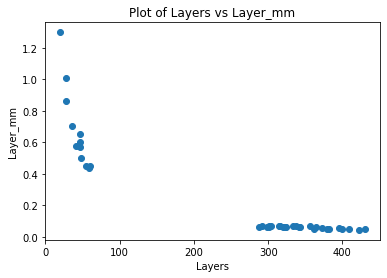

In [ ]:
# Plotting X and y to view possible correlation
plt.scatter(X, y)
plt.xlabel("Layers")
plt.ylabel("Layer_mm")
plt.title("Plot of Layers vs Layer_mm")

## Linear

In [ ]:
model = LinearRegression()

In [ ]:
X1 = np.array(layers_mm['Layers']).reshape(-1, 1)
model.fit(X1, y)

LinearRegression()

In [ ]:
model = LinearRegression().fit(X1, y)

In [ ]:
r_sq = model.score(X1, y)

In [ ]:
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8038113095604733


## Poly Continue

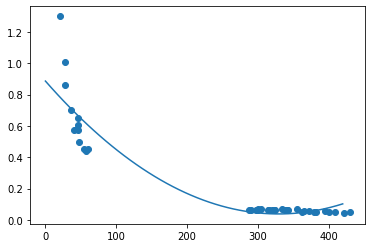

In [ ]:
# Polynomial fit with degree = 2
model = np.poly1d(np.polyfit(X, y, 2))

# Adding fitted polynomial line to scatterplot
polyline = np.linspace(0, 420, 50)
# Plotting X and y
plt.scatter(X, y)
# Plotting fitted line to plot
plt.plot(polyline, model(polyline))
plt.show()

In [ ]:
print(model)

           2
7.817e-06 x - 0.005149 x + 0.8863


In [ ]:
def score(x, y):
  for i in range(12):
    # Polynomial fit with increasing degree
    model = np.poly1d(np.polyfit(x, y, i))
    print('Polynomial degree:', i)
    print()
    print(model)
    
    # Adding fitted polynomial line to scatterplot
    polyline = np.linspace(0, 420, 50)
    # Plotting X and y
    plt.scatter(x, y)
    # Plotting fitted line to plot
    plt.plot(polyline, model(polyline))
    plt.show()



    print('R2 Score:', r2_score(y, model(x)))
    print('---------')
  return 

Polynomial degree: 0

 
0.263


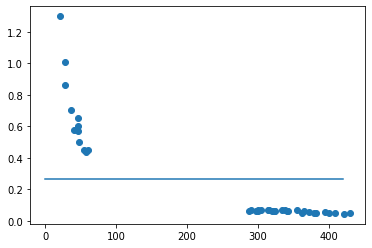

R2 Score: 0.0
---------
Polynomial degree: 1

 
-0.001942 x + 0.7393


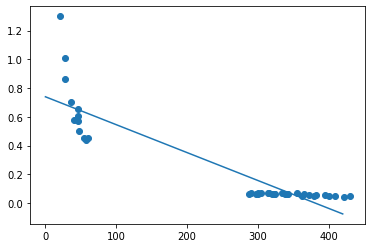

R2 Score: 0.8038113095604734
---------
Polynomial degree: 2

           2
7.817e-06 x - 0.005149 x + 0.8863


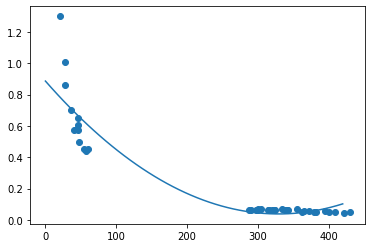

R2 Score: 0.8723959898627582
---------
Polynomial degree: 3

            3             2
-1.188e-07 x + 9.671e-05 x - 0.02324 x + 1.488


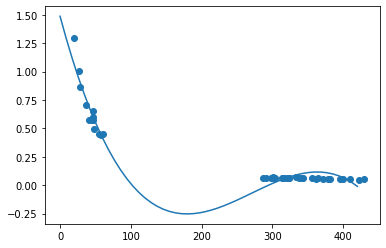

R2 Score: 0.9586474482202432
---------
Polynomial degree: 4

           4             3            2
4.395e-10 x - 5.102e-07 x + 0.000208 x - 0.034 x + 1.76


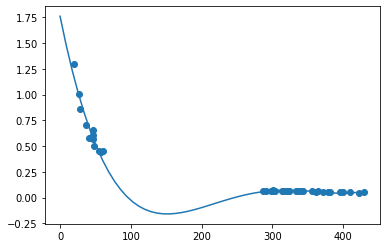

R2 Score: 0.983019867677199
---------
Polynomial degree: 5

            5             4            3             2
-3.335e-12 x + 4.335e-09 x - 2.11e-06 x + 0.0004725 x - 0.04824 x + 1.983


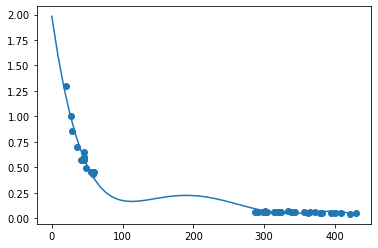

R2 Score: 0.9863938024954493
---------
Polynomial degree: 6

           6            5             4            3            2
3.453e-14 x - 5.36e-11 x + 3.242e-08 x - 9.54e-06 x + 0.001387 x - 0.09094 x + 2.597


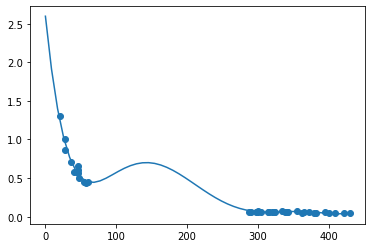

R2 Score: 0.9926698453915163
---------
Polynomial degree: 7

            7             6             5             4             3
-1.393e-16 x + 2.558e-13 x - 1.915e-10 x + 7.464e-08 x - 1.606e-05 x
             2
 + 0.001858 x - 0.106 x + 2.765


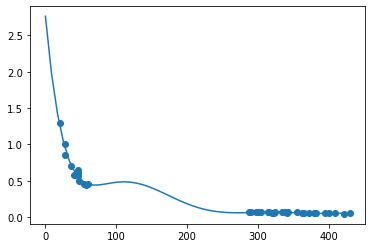

R2 Score: 0.9932519874219886
---------
Polynomial degree: 8

           8             7             6             5            4
2.866e-18 x - 5.652e-15 x + 4.599e-12 x - 1.985e-09 x + 4.86e-07 x
              3            2
 - 6.709e-05 x + 0.004979 x - 0.193 x + 3.628


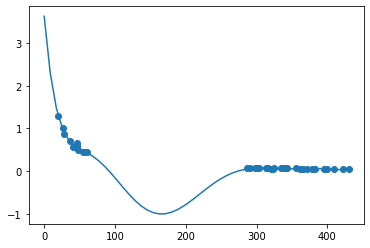

R2 Score: 0.9942329304456415
---------
Polynomial degree: 9

            9             8             7             6             5
-1.184e-20 x + 2.742e-17 x - 2.697e-14 x + 1.463e-11 x - 4.752e-09 x
              4             3            2
 + 9.381e-07 x - 0.0001095 x + 0.007117 x - 0.2455 x + 4.107


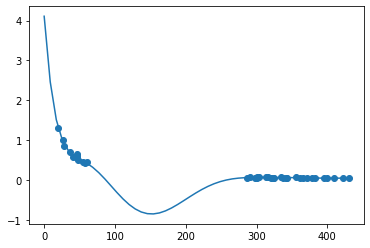

R2 Score: 0.9946061058998198
---------
Polynomial degree: 10

           10             9             8             7             6
5.462e-23 x  - 1.393e-19 x + 1.539e-16 x - 9.642e-14 x + 3.756e-11 x
              5           4             3            2
 - 9.386e-09 x + 1.5e-06 x - 0.0001484 x + 0.008592 x - 0.2736 x + 4.314


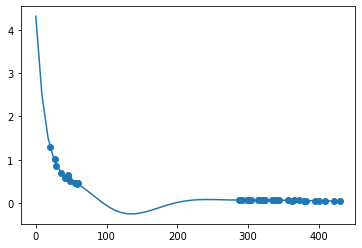

R2 Score: 0.9946251898006311
---------
Polynomial degree: 11

           11             10             9             8             7
3.147e-25 x  - 7.836e-22 x  + 8.316e-19 x - 4.857e-16 x + 1.666e-13 x
              6             5             4             3            2
 - 3.218e-11 x + 2.501e-09 x + 2.345e-07 x - 6.847e-05 x + 0.005757 x - 0.2222 x + 3.951


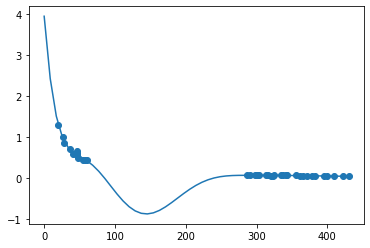

R2 Score: 0.9946309225379906
---------


In [ ]:
score(X, y)

## FULL_Model

##### Polynomial value of 3 has been chosen for comparison, in theory I would choose 4, due to the fact that a value of 3 leaves the data to the bottom right with great variance, given that the data is relatively close this widely changes the result.

Polynomial degree: 4

           4             3            2
4.395e-10 x - 5.102e-07 x + 0.000208 x - 0.034 x + 1.76


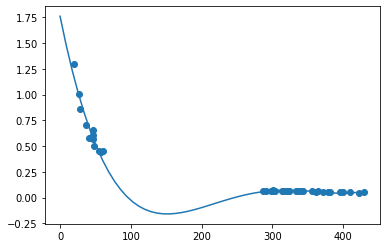

In [ ]:
full_model = np.poly1d(np.polyfit(X, y, 4))
print('Polynomial degree:', 4)
print()
print(full_model)


# Adding fitted polynomial line to scatterplot
polyline = np.linspace(0, 420, 50)
# Plotting X and y
plt.scatter(X, y)
# Plotting fitted line to plot
plt.plot(polyline, full_model(polyline))
plt.show()

# Testing Full Model

To compare results the same scan will be tested as above.

Taking Scan 7

Height_Layers: 41

Width_Layers: 316

Depth_Layers: 298

In [ ]:
print("mm per layer height:",full_model(41))  # true value: 0.57561
print("mm per layer width:",full_model(316))   # true value: 0.065823
print("mm per layer depth:",full_model(298))   # true value: 0.064094

mm per layer height: 0.6815778936004286
mm per layer width: 0.07146130732632328
mm per layer depth: 0.06541176628838352


Testing on 1.5cm echogenic cube

In [ ]:
print("mm per layer height:",full_model(56)) # true value: 0.2678 
print("mm per layer width:",full_model(369)) # true value: 0.04065  
print("mm per layer depth:",full_model(319)) # true value: 0.047

mm per layer height: 0.4228794588327165
mm per layer width: 0.05236590463359425
mm per layer depth: 0.0716564588820483


# Conclusion